**Put any package imports you need in the below space**

In [163]:
from igraph import *
import numpy as np
import matplotlib.pyplot as plt
import math

**Exercise 1**: Generating the adjacency matrix A for graphs of particular type. Write a script that generates the adjacency matrix A for each of the following graphs and prints this matrix onto the screen:
1. K5: 5-clique, or a fully connected simple, undirected graph of 5 nodes

2. K5.3: two disconnected components, C1 and C2, where C1 is a 5-clique K5 and C2 is a 3-clique K3
3. K5.3e: Almost the same as K53 but there is a single edge connecting the two components
4. B2.3: Complete bi-partite graph with n1=2 nodes in the first part and n2=3 nodes in the second part
5. S5: A 5-vertex star (one central "hub" node that connects to all the other "spoke" nodes)
6. P5: A simple path of 5 vertices


In [164]:
#K5
g1=Graph.Full(5)
a1= g1.get_adjacency()

print a1

[[0, 1, 1, 1, 1]
 [1, 0, 1, 1, 1]
 [1, 1, 0, 1, 1]
 [1, 1, 1, 0, 1]
 [1, 1, 1, 1, 0]]


In [165]:
#K5.3
g2_1=Graph.Full(5)
g2_2=Graph.Full(3)
g2=g2_1 + g2_2
a2=g2.get_adjacency()

print a2

[[0, 1, 1, 1, 1, 0, 0, 0]
 [1, 0, 1, 1, 1, 0, 0, 0]
 [1, 1, 0, 1, 1, 0, 0, 0]
 [1, 1, 1, 0, 1, 0, 0, 0]
 [1, 1, 1, 1, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 1]
 [0, 0, 0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 1, 1, 0]]


In [166]:
#K5.3e
g3_1=Graph.Full(5)
g3_2=Graph.Full(3)
g3=g3_1 + g3_2

g3.add_edge(0,5)
a3=g3.get_adjacency()

print a3

[[0, 1, 1, 1, 1, 1, 0, 0]
 [1, 0, 1, 1, 1, 0, 0, 0]
 [1, 1, 0, 1, 1, 0, 0, 0]
 [1, 1, 1, 0, 1, 0, 0, 0]
 [1, 1, 1, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 1]
 [0, 0, 0, 0, 0, 1, 0, 1]
 [0, 0, 0, 0, 0, 1, 1, 0]]


In [167]:
#B2.3
g4=Graph.Full_Bipartite(2,3)
a4=g4.get_adjacency()

print a4

[[0, 0, 1, 1, 1]
 [0, 0, 1, 1, 1]
 [1, 1, 0, 0, 0]
 [1, 1, 0, 0, 0]
 [1, 1, 0, 0, 0]]


In [168]:
#S5
g5=Graph.Star(5)
a5=g5.get_adjacency()

print a5

[[0, 1, 1, 1, 1]
 [1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0]]


In [169]:
#P5
g6=Graph(5)
g6.add_edges([(0,1),(1,2),(2,3),(3,4)])
a6=g6.get_adjacency()

print a6

[[0, 1, 0, 0, 0]
 [1, 0, 1, 0, 0]
 [0, 1, 0, 1, 0]
 [0, 0, 1, 0, 1]
 [0, 0, 0, 1, 0]]


**Exercise 2**: Generating the degree matrix D for a given adjacency matrix A. Write a script that generates a degree matrix for each of the adjacency matrices in Exercise 1. Note that the degree matrix is a diagonal matrix where all the positions except for the diagonal are zero's. The diagonal elements correspond to the degrees of the corresponding nodes, namely Dii = degree(v_i).

In [170]:
def find_deg(row):
    sum=0
    for i in range(len(row)):
        sum+=row[i]
    return sum

def deg_matrix(adj):
    n=adj.shape[0]
    dm=np.zeros((n,n))
    
    for i in range(n):
        dm[i][i]=find_deg(adj[i])
        
    return dm

In [171]:
#K5
d1=deg_matrix(a1)
print d1

[[4. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 4.]]


In [172]:
#K5.3
d2=deg_matrix(a2)
print d2

[[4. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2.]]


In [173]:
#K5.3e
d3=deg_matrix(a3)
print d3

[[5. 0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2.]]


In [174]:
#B2.3
d4=deg_matrix(a4)
print d4

[[3. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 2.]]


In [175]:
#S5
d5=deg_matrix(a5)
print d5

[[4. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [176]:
#P5
d6=deg_matrix(a6)
print d6

[[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 1.]]


**Exercise 3**: Generating the graph Laplacian matrix L for a given adjacency matrix A and its degree matrix D. Write a script that generates the graph Laplacian matrix L = D - A for each of the adjacency matrices in Exercise 1.

In [177]:
l1=d1-np.array(a1.data)
print l1

[[ 4. -1. -1. -1. -1.]
 [-1.  4. -1. -1. -1.]
 [-1. -1.  4. -1. -1.]
 [-1. -1. -1.  4. -1.]
 [-1. -1. -1. -1.  4.]]


In [178]:
l2=d2-np.array(a2.data)
print l2

[[ 4. -1. -1. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1. -1.  0.  0.  0.]
 [-1. -1.  4. -1. -1.  0.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [-1. -1. -1. -1.  4.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2. -1. -1.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0. -1. -1.  2.]]


In [179]:
l3=d3-np.array(a3.data)
print l3

[[ 5. -1. -1. -1. -1. -1.  0.  0.]
 [-1.  4. -1. -1. -1.  0.  0.  0.]
 [-1. -1.  4. -1. -1.  0.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [-1. -1. -1. -1.  4.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  3. -1. -1.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0. -1. -1.  2.]]


In [180]:
l4=d4-np.array(a4.data)
print l4

[[ 3.  0. -1. -1. -1.]
 [ 0.  3. -1. -1. -1.]
 [-1. -1.  2.  0.  0.]
 [-1. -1.  0.  2.  0.]
 [-1. -1.  0.  0.  2.]]


In [181]:
l5=d5-np.array(a5.data)
print l5

[[ 4. -1. -1. -1. -1.]
 [-1.  1.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]
 [-1.  0.  0.  1.  0.]
 [-1.  0.  0.  0.  1.]]


In [182]:
l6=d6-np.array(a6.data)
print l6

[[ 1. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  1.]]


Answer the following questions:
1. Is L a sparse matrix?

Ans: No

2. In what positions does L have non-zero elements?

Ans: L has non zero elements at the diagonals and edge locations.

3. What are the values of the non-diagonal and non-zero elements?

Ans: -1
     
4. What does L contain along its diagonal?

Ans: The degree of the vertex.


**Exercise 4**: Generating the graph spectrum, or the multiset of the eigenvalues of the graph adjacency matrix A. Write a script that calculates the eigenvalues of the graph adjacency matrix for each of the matrices in Exercise 1. Plot the eigenvalues in the increasing order of their values

In [183]:
def plot_eigenvalues(matrix):
    eigenvalues=np.sort(np.linalg.eig(matrix)[0])
    print ['%0.3f' % eigenvalue for eigenvalue in eigenvalues]
    plt.plot(eigenvalues)
    plt.ylabel('Eigenvalues')
    plt.show()

['-1.000', '-1.000', '-1.000', '-1.000', '4.000']


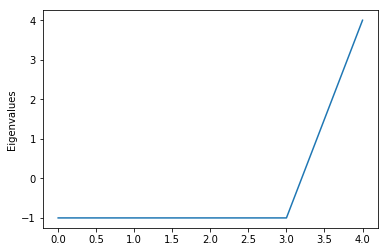

In [184]:
plot_eigenvalues(a1.data)

['-1.000', '-1.000', '-1.000', '-1.000', '-1.000', '-1.000', '2.000', '4.000']


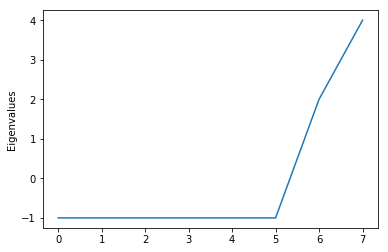

In [185]:
plot_eigenvalues(a2.data)

['-1.780', '-1.000', '-1.000', '-1.000', '-1.000', '-0.337', '2.055', '4.062']


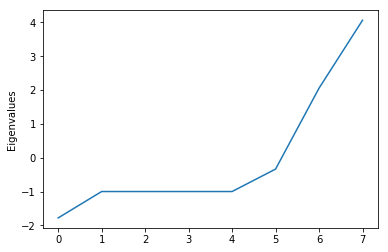

In [186]:
plot_eigenvalues(a3.data)

['-2.449', '0.000', '0.000', '0.000', '2.449']


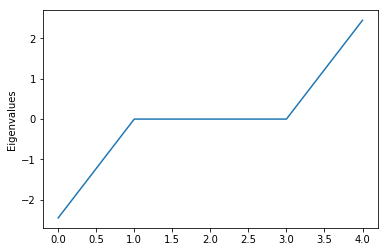

In [187]:
plot_eigenvalues(a4.data)

['-2.000', '0.000', '0.000', '0.000', '2.000']


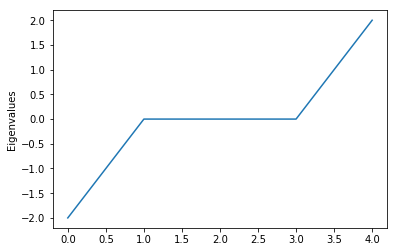

In [188]:
plot_eigenvalues(a5.data)

['-1.732', '-1.000', '-0.000', '1.000', '1.732']


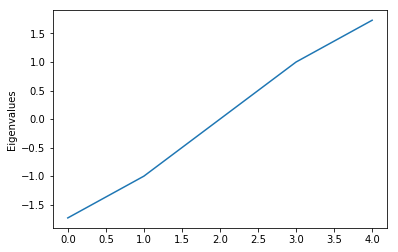

In [189]:
plot_eigenvalues(a6.data)

Answer the following questions:
1. What can you say about the eigenvalues of the complete graph (K5): the number of unique eigenvalues, the largest and the smallest eigenvalues, the multiplicity (how many times the same eigenvalue appears) of each eigenvalue?

Ans: Number of unique eigen values: 2
Largest and smallest eigen value: -1 and 4 respectively.
Multiplicity: -1 occurs 4 times and 4 occurs 1 time.

2. What is the graph spectrum of the bi-partite graph, B2.3? If n1 = n and n2 = m (a general complete bi-partite graph), then what can you say about its graph spectrum? [Hint: check sqrt(n * m)] If \lambda is the eigenvalue of the bi-partite graph, will minus \lambda be also the eigenvalue?

Ans: 

Graph spectrum: [-2.449,0.000,2.449]

For a general complete bi-partite graph, the spectrum is: [-sqrt(n*m), 0, sqrt(n*m)]

Yes, if lambda is an eigen value, the -lambda wil be an eigenvalue too.

3. What is the largest eigenvalue of the star graph S5? If S5 were generalized to an N-vertex star, what could you say about the value of its largest eigenvalue?

Ans: Largest eigenvalue: 2

For a generalized n vertex star graph, the largest eigenvalue would be sqrt(n-1).

4. What is the largest eigenvalue of the path graph P5? As the length of the path increases, what can you say about the changes in the largest eigenvalue?

Ans: Largest eigen value: 1.732

As length of the path increases, the largest eigenvalue would increase by value.

5. How does the largest eigenvalue of the path P5 (or its more generalization to an arbitrary length) compare with the largest eigenvalues of the star graph or the complete graph? If you are asked to sort the largest eigenvalue of the path, the star, and the clique) in the increasing order, what kind of relationship would you assign (E.g., \lambda{path} > or < than \lambda{star})?

Ans:

Largest eigenvalue of the path graph: 1.732

Largest eigenvalue of the star graph: 2

Largest eigenvalue of the complete graph: 4

Therefore, the relationship would be: lambda{clique} > lambda{star} > lambda{path}


**Exercise 5**: Generating the graph spectrum, or the multiset of the eigenvalues of the graph Laplacian. Write a script that calculates the eigenvalues of the graph Laplacian for each of the graphs in Exercise 1. Plot the eigenvalues in the increasing order of their values. 

['0.000', '5.000', '5.000', '5.000', '5.000']


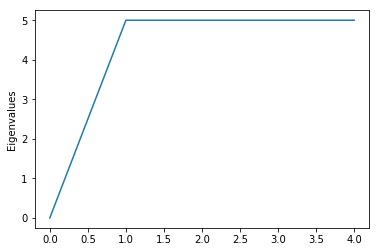

In [190]:
plot_eigenvalues(l1)

['-0.000', '0.000', '3.000', '3.000', '5.000', '5.000', '5.000', '5.000']


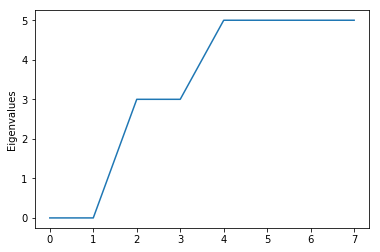

In [191]:
plot_eigenvalues(l2)

['-0.000', '0.374', '3.000', '3.485', '5.000', '5.000', '5.000', '6.141']


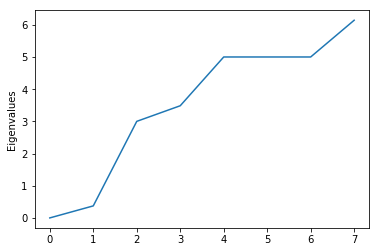

In [192]:
plot_eigenvalues(l3)

['0.000', '2.000', '2.000', '3.000', '5.000']


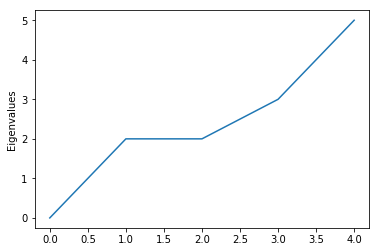

In [193]:
plot_eigenvalues(l4)

['0.000', '1.000', '1.000', '1.000', '5.000']


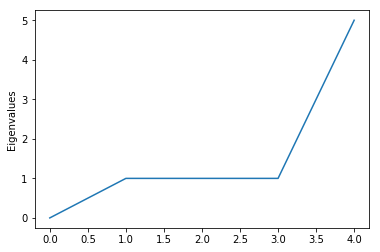

In [194]:
plot_eigenvalues(l5)

['0.000', '0.382', '1.382', '2.618', '3.618']


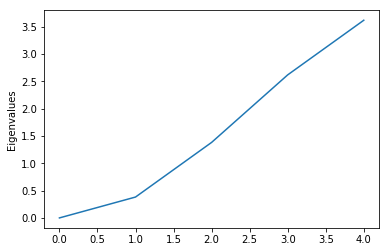

In [195]:
plot_eigenvalues(l6)

Answer the following questions:
1. What can you say about the largest and the smallest eigenvalues?

Ans:

K5:    Smallest = 0 Largest = 5

K5.3:  Smallest = 0 Largest = 5

K5.3e: Smallest = 0 Largest = 6.141

B2.3:  Smallest = 0 Largest = 5

S5:    Smallest = 0 Largest = 5

P5:    Smallest = 0 Largest = 3.618

2. What is the multiplicity (how many times the same eigenvalue appears) of the zero eigenvalue for each of the cases?

Ans:

K5:    1

K5.3:  2

K5.3e: 1

B2.3:  1

S5:    1

P5:    1

3. If K53 graph would be generalized to include c>2 components, what can you say about the multiplicity of the zero eigenvalues?

Ans: The multiplicity of the eigenvalue 0 denotes the number of disconnected components.

4. If graph G is connected (i.e., the number of disconnected components is one), what can you say about the multiplicity of the zero eigenvalue?

Ans: Multiplicity is 1.

5. For the bi-partite graph, what is the value of the second smallest eigenvalue?

Ans: Value of the second smallest eigen value: 2

6. Is the vector, whose components consist of 1's only, the eigenvector of the Laplacian? If it is, then what is its corresponding eigenvalue?

Ans: Corresponding eigen value: 0

7. Suppose the graph Laplacian matrix has the zero eigenvalue of multiplicity k. Can you say anything about the structure of such a graph?

Ans: The graph has k disconnected components.
